# New Section

 Cleaned Columns in dataset: ['Country', 'Year', 'Total Water Consumption (Billion Cubic Meters)', 'Per Capita Water Use (Liters per Day)', 'Agricultural Water Use (%)', 'Industrial Water Use (%)', 'Household Water Use (%)', 'Rainfall Impact (Annual Precipitation in mm)', 'Groundwater Depletion Rate (%)', 'Water Scarcity Level']
✅ Using column for demand: 'Total Water Consumption (Billion Cubic Meters)'

 Model Evaluation Metrics:
MAE: 85.62
RMSE: 102.83
R² Score: -0.01


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


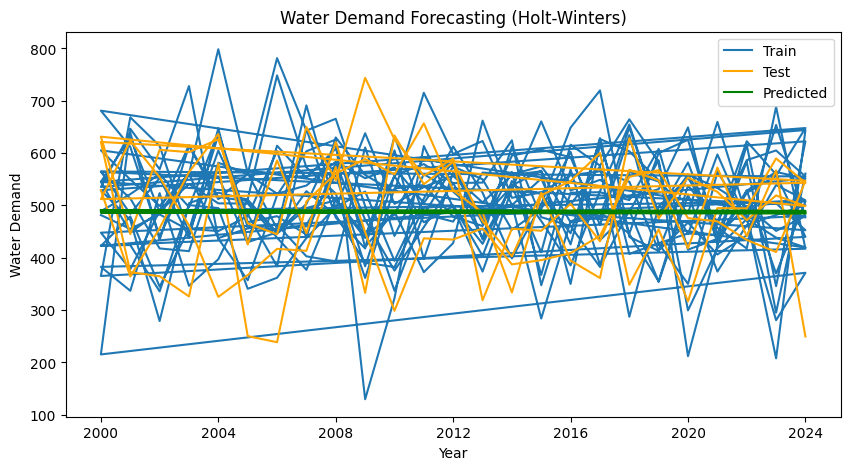


 Model saved as water_forecast_model.pkl

🔮 Future Water Demand Forecast (Next 10 years):
2025-12-31   NaN
2026-12-31   NaN
2027-12-31   NaN
2028-12-31   NaN
2029-12-31   NaN
2030-12-31   NaN
2031-12-31   NaN
2032-12-31   NaN
2033-12-31   NaN
2034-12-31   NaN
Freq: YE-DEC, dtype: float64


/tmp/ipython-input-1327424482.py:73: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_index = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=10, freq="Y")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import difflib


df = pd.read_csv("/content/drive/MyDrive/cleaned_global_water_consumption.csv")


df.columns = df.columns.str.strip().str.replace("\n", " ").str.replace("\r", " ")

print(" Cleaned Columns in dataset:", df.columns.tolist())


target = "Total water consumption"
matches = difflib.get_close_matches(target, df.columns, n=1, cutoff=0.3)

if matches:
    water_col = matches[0]
else:
    raise KeyError(f" Could not detect column containing '{target}'. Available: {df.columns.tolist()}")

print(f"✅ Using column for demand: '{water_col}'")


df[water_col] = pd.to_numeric(df[water_col], errors="coerce")
df.dropna(subset=[water_col], inplace=True)


if "Year" in df.columns:
    df["Year"] = pd.to_datetime(df["Year"], format="%Y")
    df.set_index("Year", inplace=True)
else:
    raise KeyError(" No 'Year' column found in dataset.")


train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]


model = ExponentialSmoothing(train[water_col], trend="add", seasonal=None).fit()
pred = model.forecast(len(test))


mae = mean_absolute_error(test[water_col], pred)
rmse = np.sqrt(mean_squared_error(test[water_col], pred))
r2 = r2_score(test[water_col], pred)

print("\n Model Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


plt.figure(figsize=(10,5))
plt.plot(train.index, train[water_col], label="Train")
plt.plot(test.index, test[water_col], label="Test", color="orange")
plt.plot(test.index, pred, label="Predicted", color="green")
plt.xlabel("Year")
plt.ylabel("Water Demand")
plt.title("Water Demand Forecasting (Holt-Winters)")
plt.legend()
plt.show()

joblib.dump(model, "water_forecast_model.pkl")
print("\n Model saved as water_forecast_model.pkl")


loaded_model = joblib.load("water_forecast_model.pkl")
future_index = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=10, freq="Y")
future_forecast = pd.Series(loaded_model.forecast(10), index=future_index)

print("\n🔮 Future Water Demand Forecast (Next 10 years):")
print(future_forecast)









